In [1]:
# Install required packages.
import os

#!pip install torch==1.7.0
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-aqn508oq
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-aqn508oq
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit 7ac4654db727df73d1443c5102020abe859e5eb6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
import math

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear, LayerNorm
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
from torch import sigmoid
from itertools import chain
from time import perf_counter
from torch_geometric.data import Data, Batch, Dataset
from functools import partial
from torch_geometric.utils import to_networkx
from torch_geometric.utils import remove_self_loops
from typing import Callable, Union, Optional
#from torch_geometric.utils.num_nodes import maybe_num_nodes
import networkx as nx
from typing import List, Tuple, Dict
from collections import Counter
import statistics
from scipy import stats
import logging
import pandas as pd
import csv
from statistics import mean


from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


In [9]:
Explainability_name = 'PGMExplainer'
Task_name = 'Graph Classification'
Model_Name = "GCN_plus_GAP"
checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/model_classifier.pt"
Model_name = "GCN_plus_GAP"
DataSet_name = "MUTAG"
classifier_lr = 0.001
classifier_dropout = 0.1
classifier_weight_decay = 1e-6
classifier_bias = True

File_Name = Model_name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [6]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

train_dataset = []
test_dataset = []
for index in read_training_list_indexes:
    train_dataset.append(dataset[index])
for index in read_test_list_indexes:
    test_dataset.append(dataset[index])


print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [10]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)
import GCN_plus_GAP as Graph_Network
GNN_Model = Graph_Network.GCN_plus_GAP(model_name='GCN_plus_GAP', model_level='graph', input_dim=7, hidden_dim=7, output_dim=2,
                                       num_hid_layers=2, Bias=True, act_fun='ReLu', Weight_Initializer=1, dropout_rate=0.1)

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
ReLu is Selected.


In [11]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch

In [ ]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [ ]:
def train_step():
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in train_dataloader:
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        batch_loss = loss_calculations(soft, batch_of_graphs.y)
        #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs)
        #batch_loss = loss_calculations(softmaxed_h2, batch_of_graphs.y)
        #print('passed')
        Pred_Labels.extend(soft.argmax(dim=1).detach().tolist())
        Real_Labels.extend(batch_of_graphs.y.detach().tolist())
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [ ]:
GNN_Model_training_Acc_per_epoch = []
GNN_Model_training_time_per_epoch = []
def train(EPOCHS, load_index):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        t1 = perf_counter()
        GNN_Model_training_loss, training_acc = train_step()
        GNN_Model_training_time_per_epoch.append(perf_counter()-t1)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
            torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 0.7427
Epoch: 002, Model Loss: 0.7384
Epoch: 003, Model Loss: 0.7334
Epoch: 004, Model Loss: 0.7298
Epoch: 005, Model Loss: 0.7264
Epoch: 006, Model Loss: 0.7222
Epoch: 007, Model Loss: 0.7173
Epoch: 008, Model Loss: 0.7137
Epoch: 009, Model Loss: 0.7117
Epoch: 010, Model Loss: 0.7063
Epoch: 011, Model Loss: 0.7030
Epoch: 012, Model Loss: 0.6962
Epoch: 013, Model Loss: 0.6932
Epoch: 014, Model Loss: 0.6900
Epoch: 015, Model Loss: 0.6856
Epoch: 016, Model Loss: 0.6824
Epoch: 017, Model Loss: 0.6794
Epoch: 018, Model Loss: 0.6757
Epoch: 019, Model Loss: 0.6715
Epoch: 020, Model Loss: 0.6675
Epoch: 021, Model Loss: 0.6652
Epoch: 022, Model Loss: 0.6626
Epoch: 023, Model Loss: 0.6613
Epoch: 024, Model Loss: 0.6589
Epoch: 025, Model Loss: 0.6563
Epoch: 026, Model Loss: 0.6554
Epoch: 027, Model Loss: 0.6505
Epoch: 028, Model Loss: 0.6485
Epoch: 029, Model Loss: 0.6516
Epoch: 030, Model Loss: 0.6457
Epoch: 031, Model Loss: 0.6465
Epoch: 032, Model Loss: 0.6431
Epoch: 0

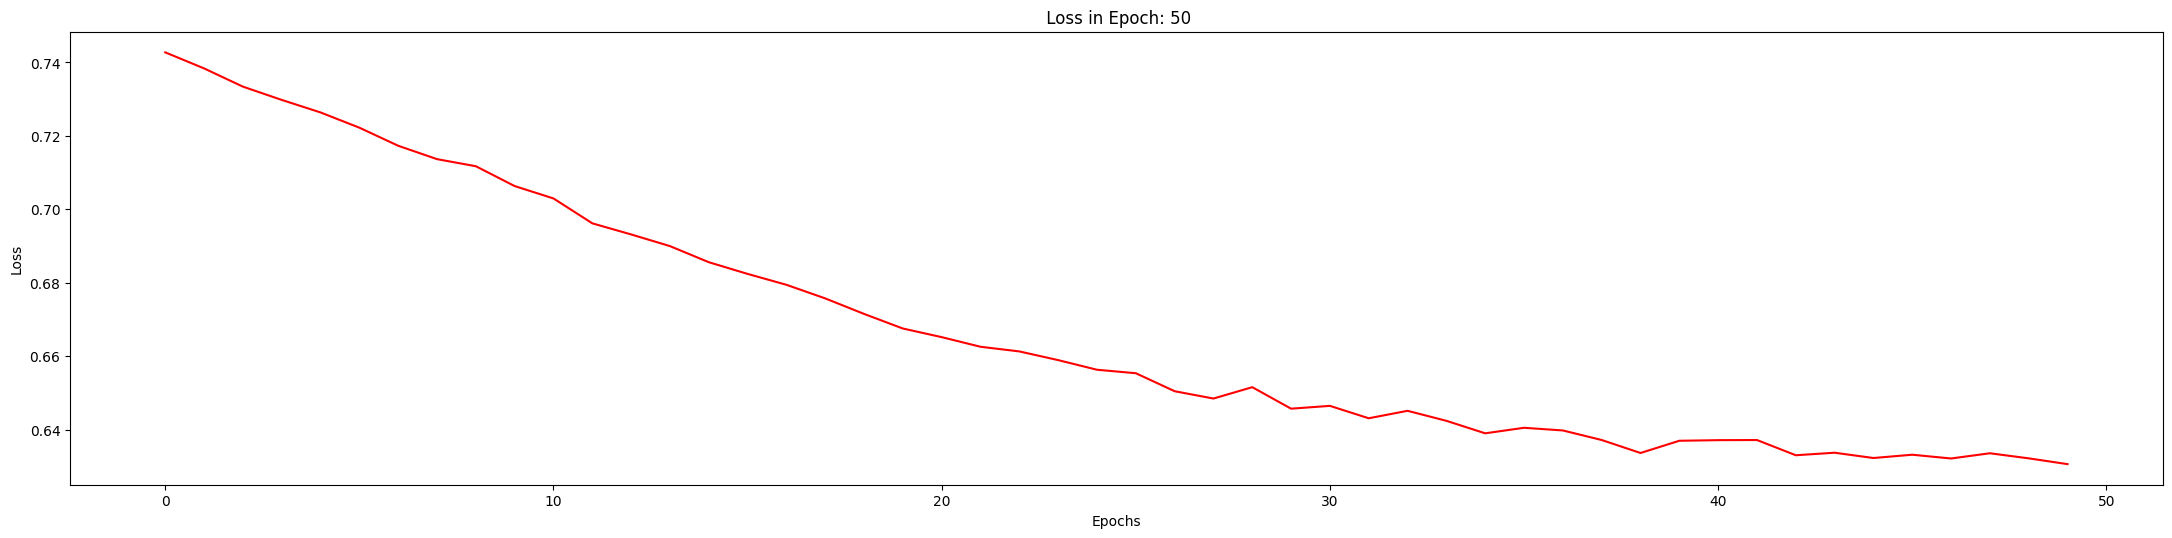

Epoch: 051, Model Loss: 0.6294
Epoch: 052, Model Loss: 0.6323
Epoch: 053, Model Loss: 0.6303
Epoch: 054, Model Loss: 0.6270
Epoch: 055, Model Loss: 0.6279
Epoch: 056, Model Loss: 0.6315
Epoch: 057, Model Loss: 0.6319
Epoch: 058, Model Loss: 0.6282
Epoch: 059, Model Loss: 0.6296
Epoch: 060, Model Loss: 0.6312
Epoch: 061, Model Loss: 0.6285
Epoch: 062, Model Loss: 0.6274
Epoch: 063, Model Loss: 0.6286
Epoch: 064, Model Loss: 0.6278
Epoch: 065, Model Loss: 0.6255
Epoch: 066, Model Loss: 0.6255
Epoch: 067, Model Loss: 0.6252
Epoch: 068, Model Loss: 0.6259
Epoch: 069, Model Loss: 0.6268
Epoch: 070, Model Loss: 0.6281
Epoch: 071, Model Loss: 0.6238
Epoch: 072, Model Loss: 0.6245
Epoch: 073, Model Loss: 0.6221
Epoch: 074, Model Loss: 0.6240
Epoch: 075, Model Loss: 0.6231
Epoch: 076, Model Loss: 0.6221
Epoch: 077, Model Loss: 0.6233
Epoch: 078, Model Loss: 0.6227
Epoch: 079, Model Loss: 0.6252
Epoch: 080, Model Loss: 0.6207
Epoch: 081, Model Loss: 0.6199
Epoch: 082, Model Loss: 0.6206
Epoch: 0

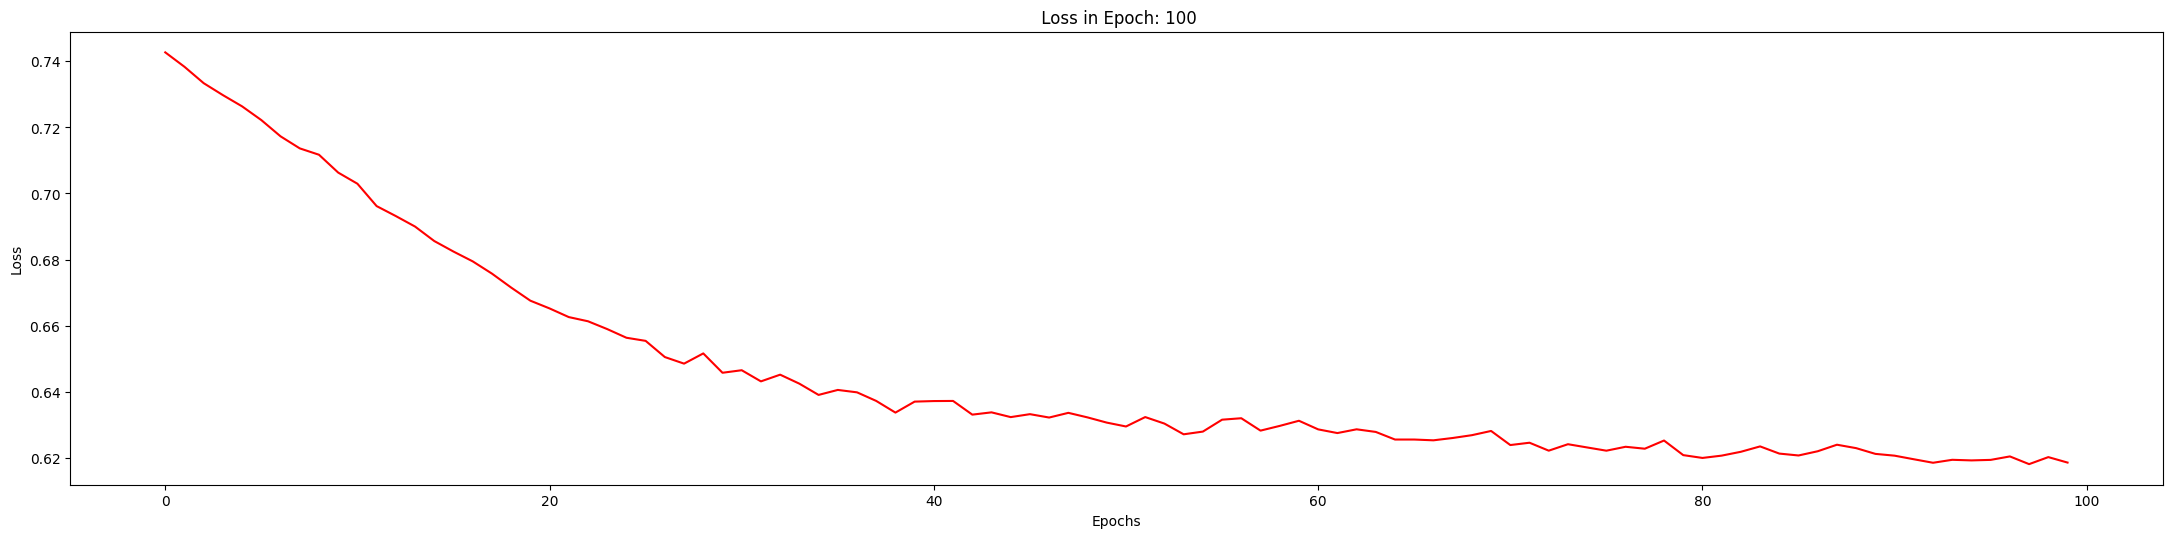

Epoch: 101, Model Loss: 0.6193
Epoch: 102, Model Loss: 0.6181
Epoch: 103, Model Loss: 0.6160
Epoch: 104, Model Loss: 0.6173
Epoch: 105, Model Loss: 0.6145
Epoch: 106, Model Loss: 0.6138
Epoch: 107, Model Loss: 0.6149
Epoch: 108, Model Loss: 0.6164
Epoch: 109, Model Loss: 0.6155
Epoch: 110, Model Loss: 0.6129
Epoch: 111, Model Loss: 0.6150
Epoch: 112, Model Loss: 0.6158
Epoch: 113, Model Loss: 0.6143
Epoch: 114, Model Loss: 0.6125
Epoch: 115, Model Loss: 0.6141
Epoch: 116, Model Loss: 0.6119
Epoch: 117, Model Loss: 0.6100
Epoch: 118, Model Loss: 0.6123
Epoch: 119, Model Loss: 0.6110
Epoch: 120, Model Loss: 0.6101
Epoch: 121, Model Loss: 0.6105
Epoch: 122, Model Loss: 0.6090
Epoch: 123, Model Loss: 0.6072
Epoch: 124, Model Loss: 0.6105
Epoch: 125, Model Loss: 0.6062
Epoch: 126, Model Loss: 0.6067
Epoch: 127, Model Loss: 0.6089
Epoch: 128, Model Loss: 0.6076
Epoch: 129, Model Loss: 0.6050
Epoch: 130, Model Loss: 0.6031
Epoch: 131, Model Loss: 0.6044
Epoch: 132, Model Loss: 0.6041
Epoch: 1

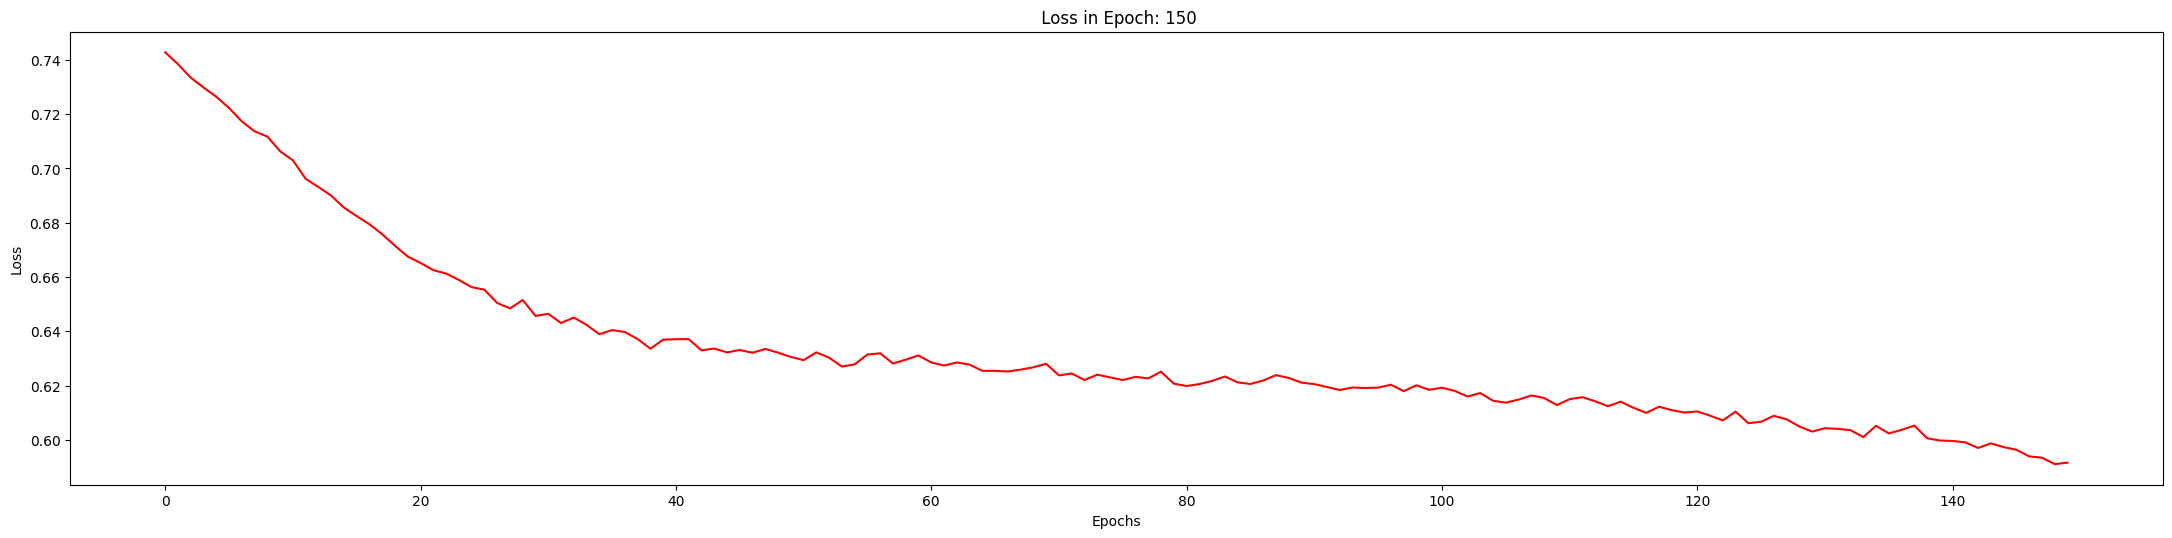

Epoch: 151, Model Loss: 0.5934
Epoch: 152, Model Loss: 0.5920
Epoch: 153, Model Loss: 0.5890
Epoch: 154, Model Loss: 0.5883
Epoch: 155, Model Loss: 0.5907
Epoch: 156, Model Loss: 0.5860
Epoch: 157, Model Loss: 0.5875
Epoch: 158, Model Loss: 0.5818
Epoch: 159, Model Loss: 0.5855
Epoch: 160, Model Loss: 0.5879
Epoch: 161, Model Loss: 0.5833
Epoch: 162, Model Loss: 0.5817
Epoch: 163, Model Loss: 0.5811
Epoch: 164, Model Loss: 0.5799
Epoch: 165, Model Loss: 0.5804
Epoch: 166, Model Loss: 0.5787
Epoch: 167, Model Loss: 0.5819
Epoch: 168, Model Loss: 0.5767
Epoch: 169, Model Loss: 0.5795
Epoch: 170, Model Loss: 0.5783
Epoch: 171, Model Loss: 0.5772
Epoch: 172, Model Loss: 0.5762
Epoch: 173, Model Loss: 0.5701
Epoch: 174, Model Loss: 0.5706
Epoch: 175, Model Loss: 0.5721
Epoch: 176, Model Loss: 0.5710
Epoch: 177, Model Loss: 0.5696
Epoch: 178, Model Loss: 0.5719
Epoch: 179, Model Loss: 0.5688
Epoch: 180, Model Loss: 0.5736
Epoch: 181, Model Loss: 0.5645
Epoch: 182, Model Loss: 0.5713
Epoch: 1

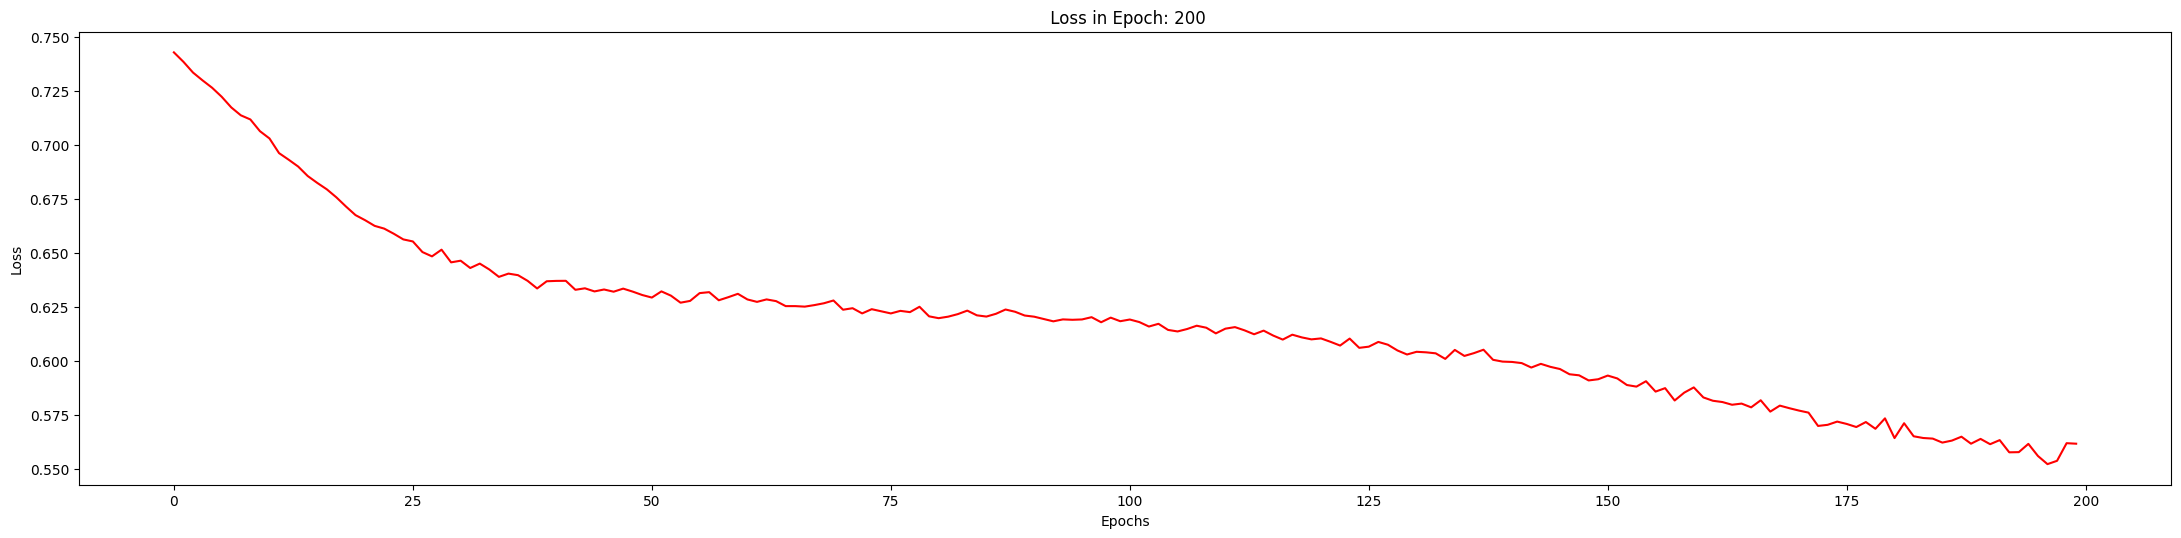

Epoch: 201, Model Loss: 0.5546
Epoch: 202, Model Loss: 0.5564
Epoch: 203, Model Loss: 0.5521
Epoch: 204, Model Loss: 0.5549
Epoch: 205, Model Loss: 0.5553
Epoch: 206, Model Loss: 0.5528
Epoch: 207, Model Loss: 0.5513
Epoch: 208, Model Loss: 0.5524
Epoch: 209, Model Loss: 0.5519
Epoch: 210, Model Loss: 0.5471
Epoch: 211, Model Loss: 0.5467
Epoch: 212, Model Loss: 0.5513
Epoch: 213, Model Loss: 0.5447
Epoch: 214, Model Loss: 0.5457
Epoch: 215, Model Loss: 0.5469
Epoch: 216, Model Loss: 0.5519
Epoch: 217, Model Loss: 0.5437
Epoch: 218, Model Loss: 0.5455
Epoch: 219, Model Loss: 0.5498
Epoch: 220, Model Loss: 0.5532
Epoch: 221, Model Loss: 0.5447
Epoch: 222, Model Loss: 0.5479
Epoch: 223, Model Loss: 0.5433
Epoch: 224, Model Loss: 0.5467
Epoch: 225, Model Loss: 0.5483
Epoch: 226, Model Loss: 0.5468
Epoch: 227, Model Loss: 0.5384
Epoch: 228, Model Loss: 0.5404
Epoch: 229, Model Loss: 0.5405
Epoch: 230, Model Loss: 0.5414
Epoch: 231, Model Loss: 0.5463
Epoch: 232, Model Loss: 0.5397
Epoch: 2

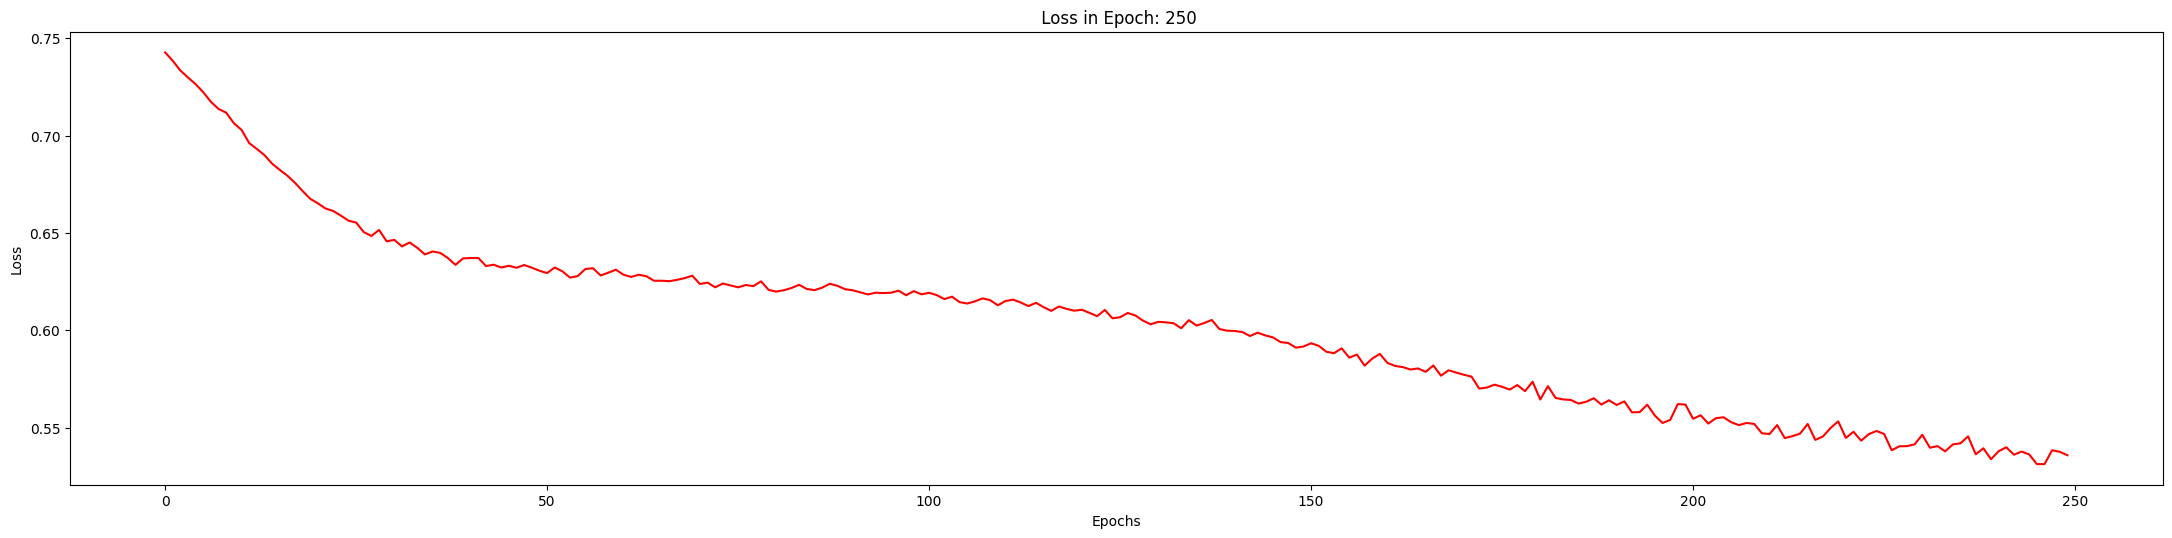

Epoch: 251, Model Loss: 0.5351
Epoch: 252, Model Loss: 0.5374
Epoch: 253, Model Loss: 0.5316
Epoch: 254, Model Loss: 0.5346
Epoch: 255, Model Loss: 0.5283
Epoch: 256, Model Loss: 0.5325
Epoch: 257, Model Loss: 0.5349
Epoch: 258, Model Loss: 0.5355
Epoch: 259, Model Loss: 0.5321
Epoch: 260, Model Loss: 0.5357
Epoch: 261, Model Loss: 0.5344
Epoch: 262, Model Loss: 0.5330
Epoch: 263, Model Loss: 0.5376
Epoch: 264, Model Loss: 0.5412
Epoch: 265, Model Loss: 0.5315
Epoch: 266, Model Loss: 0.5357
Epoch: 267, Model Loss: 0.5347
Epoch: 268, Model Loss: 0.5288
Epoch: 269, Model Loss: 0.5308
Epoch: 270, Model Loss: 0.5383
Epoch: 271, Model Loss: 0.5309
Epoch: 272, Model Loss: 0.5325
Epoch: 273, Model Loss: 0.5300
Epoch: 274, Model Loss: 0.5290
Epoch: 275, Model Loss: 0.5348
Epoch: 276, Model Loss: 0.5333
Epoch: 277, Model Loss: 0.5305
Epoch: 278, Model Loss: 0.5309
Epoch: 279, Model Loss: 0.5222
Epoch: 280, Model Loss: 0.5324
Epoch: 281, Model Loss: 0.5295
Epoch: 282, Model Loss: 0.5334
Epoch: 2

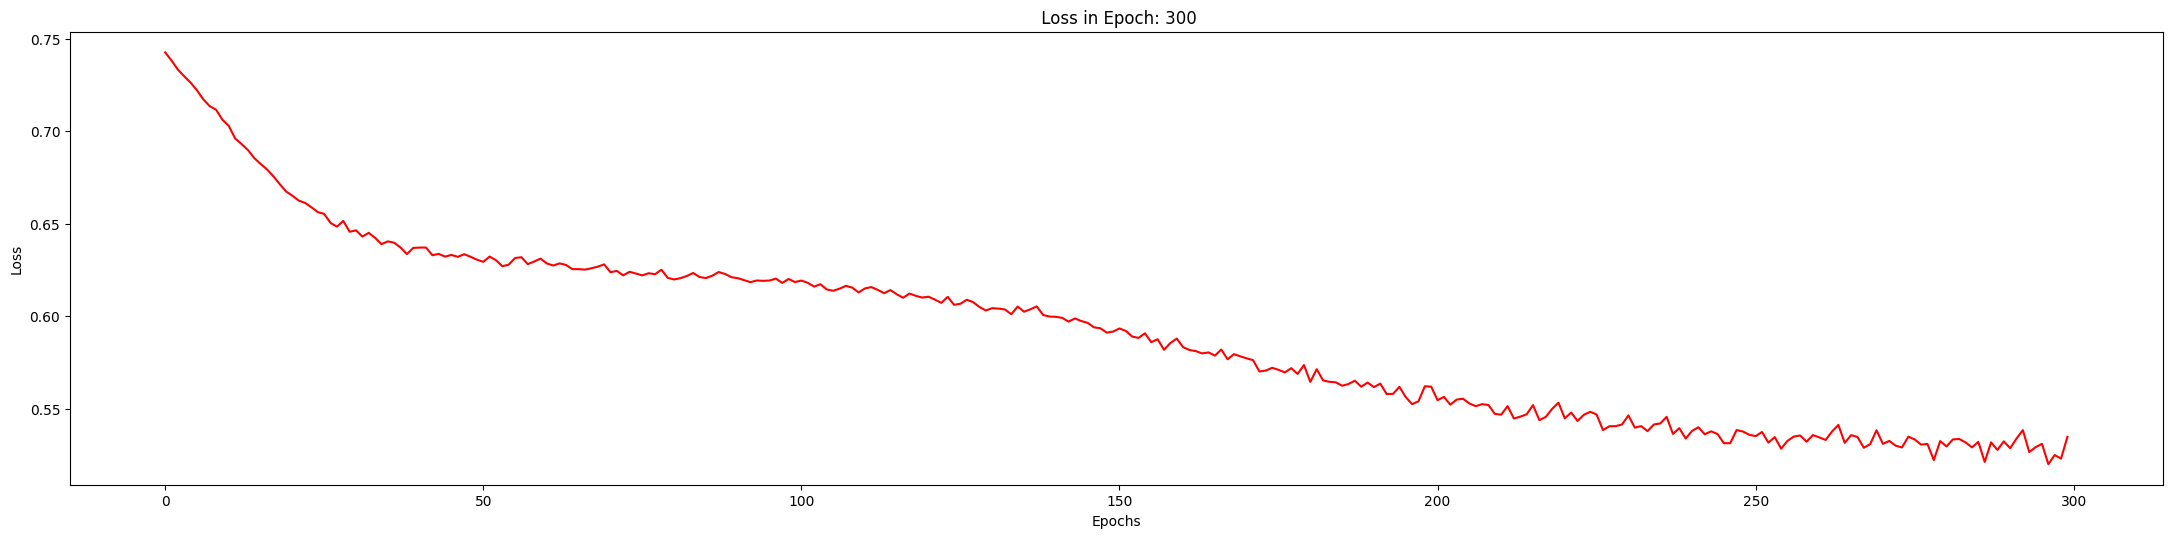

In [ ]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index)

In [ ]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(test_loader):
    GNN_Model.eval()
    correct = 0
    for batch_of_graphs in test_loader:
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batch_of_graphs)
        GNN_Model_test_pred = soft.argmax(dim=1).tolist()[0]
        #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = GNN_Model(batch_of_graphs)
        #GNN_Model_test_pred = softmaxed_h2.argmax(dim=1)
        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred)
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(test_loader.dataset), GNN_Model_test_predicted_labels

In [ ]:
GNN_Model_test_acc, predicted_labels = GNN_Model_test(test_dataloader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.5789


In [ ]:
def instance_time(test_dataset):
    instance_based_time = []
    GNN_Model.eval()
    correct = 0
    for batched_data in test_dataset:
        start_generation = perf_counter()
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = GNN_Model(batched_data)
        CAM_test_pred = soft.argmax(dim=1)
        consumed_time = perf_counter() - start_generation
        instance_based_time.append(consumed_time)
    return instance_based_time

In [ ]:
samples_time = instance_time(test_dataset)
print(f'Test Instance based Time: {samples_time}')

Test Instance based Time: [0.0038663029999952414, 0.0017504369999983282, 0.0026546530000075563, 0.0015449610000075609, 0.0015901310000003832, 0.0015370469999993475, 0.0015065199999924062, 0.002345711000003803, 0.0014766360000066925, 0.0015339049999738563, 0.0015069149999931142, 0.0011615889999916362, 0.0010344540000062352, 0.0010495030000186034, 0.0011378989999855094, 0.00099042200000099, 0.0010395040000048539, 0.0010890360000246346, 0.001001922000000377, 0.0011704700000052526, 0.0015471709999985706, 0.0016435339999816279, 0.0017254770000079134, 0.0014421419999735008, 0.0011276699999882567, 0.001007895000014969, 0.0010552650000192898, 0.0010031840000124248, 0.0009753479999972114, 0.0009649989999900299, 0.0009800480000023981, 0.0010640909999892756, 0.0009479109999972479, 0.0009640860000104112, 0.000965159999992693, 0.0009583469999938643, 0.0010460870000201794, 0.000988026000015907]


In [ ]:
real_labels = []
for graph in test_dataloader:
    real_labels.append(graph.y.tolist()[0])

In [ ]:
print("predicted_labels: ", predicted_labels)
print("real_labels: ", real_labels)
print("Test Accuracy: ", metrics.accuracy_score(real_labels, predicted_labels))

predicted_labels:  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]
real_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
Test Accuracy:  0.5789473684210527


In [ ]:
Auc_Roc = metrics.roc_auc_score(real_labels, predicted_labels)
precision, recall, thresholds = metrics.precision_recall_curve(real_labels, predicted_labels)
Auc_Prc = metrics.auc(y=precision, x=recall)
Acc = metrics.accuracy_score(real_labels, predicted_labels, normalize=True)
Acc2 = metrics.accuracy_score(real_labels, predicted_labels, normalize=False)
print("Auc_Roc: ", Auc_Roc, "Auc_Prc: ", Auc_Prc, "Acc: ", Acc, "Acc2: ", Acc2)

Auc_Roc:  0.5029761904761905 Auc_Prc:  0.7782894736842105 Acc:  0.5789473684210527 Acc2:  22


In [ ]:
def power_divergence(X, Y, Z, data_pertubed_Samples, lambda_, significance_level):
    if hasattr(Z, "__iter__"):
        Z = list(Z)
    else:
        raise (f"Z must be an iterable. Got object type: {type(Z)}")

    if (X in Z) or (Y in Z):
        raise ValueError(f"The variables X or Y can't be in Z. Found {X if X in Z else Y} in Z.")
    if len(Z) == 0:
        chi, p_value, dof, expected = stats.chi2_contingency(
            data_pertubed_Samples.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
        )
    else:
        chi = 0
        dof = 0
        for z_state, df in data_pertubed_Samples.groupby(Z):
            try:
                c, _, d, _ = stats.chi2_contingency(df.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_)
                chi += c
                dof += d
            except ValueError:
                if isinstance(z_state, str):
                    logging.info(f"Skipping the test {X} \u27C2 {Y} | {Z[0]}={z_state}. Not enough samples")
                else:
                    z_str = ", ".join([f"{var}={state}" for var, state in zip(Z, z_state)])
                    logging.info(f"Skipping the test {X} \u27C2 {Y} | {z_str}. Not enough samples")
        p_value = 1 - stats.chi2.cdf(chi, df=dof)
    return chi, p_value, dof

In [ ]:
def cressie_read(X, Y, Z, data_pertubed_Samples, significance_level):
    return power_divergence(X=X, Y=Y, Z=Z, data_pertubed_Samples=data_pertubed_Samples, lambda_="cressie-read", significance_level=significance_level)

In [ ]:
x = [3.01599503e-05, 0.00000000e+00, 2, 3.01599503e-05, 1]
y = np.array(x)
print(y)
z = np.argsort(y)[-3:]
print(z)

[3.01599503e-05 0.00000000e+00 2.00000000e+00 3.01599503e-05
 1.00000000e+00]
[3 4 2]


In [ ]:
class PGM_Graph_Explainer(object):
    def __init__(self, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim, graph, perturb_feature_list, perturb_mode, perturb_indicator):
        self.Model_Name = Model_Name
        self.Task_name = 'Graph Classification'
        self.Explainability_name = "PGMExplainer"
        self.your_model = self.load_model(Task_name=self.Task_name, Explainability_name=self.Explainability_name, Model_Name=Model_Name,
                                          classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim)
        self.your_model.eval()

        self.graph = graph
        self.num_layers = 2
        self.perturb_feature_list = perturb_feature_list
        self.perturb_mode = perturb_mode
        self.perturb_indicator = perturb_indicator
        self.node_feat = graph.x.numpy()


    def load_model(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        if classifier_load_index != 0:
            GNN_Model, optimizer, classifier_load_index = self.loading_config(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name,
                                                                              classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim,
                                                                              output_dim=output_dim)
            return GNN_Model
        else:
            GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim,
                                                   hidden_dim=hid_dim, output_dim=output_dim, num_hid_layers=2,
                                                   Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
            return GNN_Model

    def loading_config(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):
        GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=input_dim, hidden_dim=hid_dim, output_dim=output_dim,
                                               num_hid_layers=2, Bias=True, act_fun='eLu', Weight_Initializer=1, dropout_rate=0.1)
        optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=0.001, weight_decay=1e-6)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + Model_name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " " + str(classifier_load_index)+".pt")
        GNN_Model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']

        return GNN_Model, optimizer, epoch

    def cressie_read(self, X, Y, Z, data_pertubed_Samples, significance_level):
        return self.power_divergence(X=X, Y=Y, Z=Z, data_pertubed_Samples=data_pertubed_Samples, lambda_="cressie-read", significance_level=significance_level)

    def power_divergence(self, X, Y, Z, data_pertubed_Samples, lambda_, significance_level):
        if hasattr(Z, "__iter__"):
            Z = list(Z)
        else:
            raise (f"Z must be an iterable. Got object type: {type(Z)}")

        if (X in Z) or (Y in Z):
            raise ValueError(f"The variables X or Y can't be in Z. Found {X if X in Z else Y} in Z.")
        if len(Z) == 0:
            chi, p_value, dof, expected = stats.chi2_contingency(
                data_pertubed_Samples.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
            )
        else:
            chi = 0
            dof = 0
            for z_state, df in data_pertubed_Samples.groupby(Z):
                try:
                    c, _, d, _ = stats.chi2_contingency(df.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_)
                    chi += c
                    dof += d
                except ValueError:
                    if isinstance(z_state, str):
                        logging.info(f"Skipping the test {X} \u27C2 {Y} | {Z[0]}={z_state}. Not enough samples")
                    else:
                        z_str = ", ".join([f"{var}={state}" for var, state in zip(Z, z_state)])
                        logging.info(f"Skipping the test {X} \u27C2 {Y} | {z_str}. Not enough samples")
            p_value = 1 - stats.chi2.cdf(chi, df=dof)
        return chi, p_value, dof


    def perturb_node_features(self, node_feature_matrix, targeted_node_idx, random_perturbation_permission):

        graph_node_features = deepcopy(node_feature_matrix)
        targeted_node_feat_to_perturb_array = deepcopy(graph_node_features[targeted_node_idx])
        # print("targeted_node_feat_to_perturb_array: ", targeted_node_feat_to_perturb_array)
        epsilon = 0.05 * np.max(self.node_feat, axis = 0)

        if random_perturbation_permission == 1:
            for i in range(targeted_node_feat_to_perturb_array.shape[0]):
                if i in self.perturb_feature_list:
                    if self.perturb_mode == "mean":
                        targeted_node_feat_to_perturb_array[i] = np.mean(node_feature_matrix[:,i])
                    elif self.perturb_mode == "zero":
                        targeted_node_feat_to_perturb_array[i] = 0
                    elif self.perturb_mode == "max":
                        targeted_node_feat_to_perturb_array[i] = np.max(node_feature_matrix[:,i])
                    elif self.perturb_mode == "uniform":
                        targeted_node_feat_to_perturb_array[i] = targeted_node_feat_to_perturb_array[i] + np.random.uniform(low=-epsilon[i], high=epsilon[i])
                        if targeted_node_feat_to_perturb_array[i] < 0:
                            targeted_node_feat_to_perturb_array[i] = 0
                        elif targeted_node_feat_to_perturb_array[i] > np.max(self.node_feat, axis = 0)[i]:
                            targeted_node_feat_to_perturb_array[i] = np.max(self.node_feat, axis = 0)[i]


        graph_node_features[targeted_node_idx] = targeted_node_feat_to_perturb_array

        return graph_node_features

    def gather_perturbed_node_features(self, sampling_count, index_to_perturb, percentage, p_value_threshold, pred_threshold):
        Output_of_Hidden_Layers, pooling_layer_output, ffn_output, pred_torch = self.your_model(self.graph)

        pred_label = pred_torch.argmax(dim=1)

        num_nodes_in_graph = self.node_feat.shape[0]
        #print("self.graph.x: ", self.graph.x)

        Samples = []
        for iteration in range(sampling_count):
            graph_original_features = deepcopy(self.node_feat)
            sample = []
            for node_index in range(num_nodes_in_graph):
                if node_index in index_to_perturb:
                    seed = np.random.randint(100)
                    if seed < percentage:
                        random_perturbation_permission = 1
                        graph_perturbed_features = self.perturb_node_features(node_feature_matrix=graph_original_features, targeted_node_idx=node_index,
                                                                              random_perturbation_permission=random_perturbation_permission)
                        #print("graph_perturbed_features: ", graph_perturbed_features)
                    else:
                        random_perturbation_permission = 0
                else:
                    random_perturbation_permission = 0
                sample.append(random_perturbation_permission)

                perturbed_graph = deepcopy(self.graph)
                if random_perturbation_permission:
                    graph_perturbed_features_torch =  torch.tensor(graph_perturbed_features, dtype=torch.float)
                    perturbed_graph.x = graph_perturbed_features_torch
                    #print("graph_perturbed_features_torch: ", graph_perturbed_features_torch)
                Output_of_Hidden_Layers, pooling_layer_output, ffn_output, pred_perturb_torch = self.your_model(perturbed_graph)


                pred_change = max(pred_torch[0].tolist()) - pred_perturb_torch[0].tolist()[pred_label]

                sample.append(pred_change)
            Samples.append(sample)

        Samples = np.asarray(Samples)
        if self.perturb_indicator == "abs":
            Samples = np.abs(Samples)
        #print("Samples: ", np.array(Samples).shape)
        top = int(sampling_count/8)
        top_idx = np.argsort(Samples[:, num_nodes_in_graph])[-top:]
        #print("top_idx: ", top_idx)
        #print("Samples[:, num_nodes_in_graph]: ", Samples[:, num_nodes_in_graph])
        for i in range(sampling_count):
            if i in top_idx:
                Samples[i,num_nodes_in_graph] = 1
            else:
                Samples[i,num_nodes_in_graph] = 0

        return Samples

    def explain(self, num_samples, percentage, top_node, p_value_threshold, pred_threshold, ctg):


        if top_node == None:
            top_node = int(self.node_feat.shape[0]/8)

#         Round 1
        Samples = self.gather_perturbed_node_features(sampling_count=num_samples, index_to_perturb=range(self.node_feat.shape[0]), percentage=percentage,
                                                      p_value_threshold=p_value_threshold, pred_threshold=pred_threshold)
        #print(len(Samples[0]), " Samples: ", list(Samples))
        data_pertubed_Samples1 = pd.DataFrame(Samples)
        #est = ConstraintBasedEstimator(data)

        p_values = []
        candidate_nodes = []
        # The entry for the graph classification data is at "num_nodes"
        for node in range(self.node_feat.shape[0]):
            chi2, p, dof = self.cressie_read(X=node, Y=self.node_feat.shape[0], Z=[], data_pertubed_Samples=data_pertubed_Samples1, significance_level=0.05)
            #print("this is returned P: ", p)
            p_values.append(p)


        number_candidates = top_node
        candidate_nodes = np.argpartition(p_values, number_candidates)[0:number_candidates]

#         Round 2
        Samples = self.gather_perturbed_node_features(sampling_count=num_samples, index_to_perturb=candidate_nodes, percentage=percentage,
                                                      p_value_threshold=p_value_threshold, pred_threshold=pred_threshold)
        data = pd.DataFrame(Samples)
        #est = ConstraintBasedEstimator(data)

        p_values = []
        dependent_nodes = []

        for node in range(self.node_feat.shape[0]):
            chi2, p, dof = self.cressie_read(X=node, Y=self.node_feat.shape[0], Z=[], data_pertubed_Samples=data, significance_level=0.05)
            #chi2, p = chi_square(node, target, [], data)
            p_values.append(p)
            if p < p_value_threshold:
                dependent_nodes.append(node)

        if ctg == 'correct':
            top_p = np.min((top_node, self.node_feat.shape[0]-1))
        elif ctg == 'incorrect':
            top_p = np.max((top_node, self.node_feat.shape[0]-1))
        ind_top_p = np.argpartition(p_values, top_p)[0:top_p]
        pgm_nodes = list(ind_top_p)

        return pgm_nodes, p_values, candidate_nodes, dependent_nodes

input_graph = dataset[0]
pgmx = PGM_Graph_Explainer(Model_Name="GCN_plus_GAP", classifier_load_index=1000, input_dim=7, hid_dim=7, output_dim=2, graph=input_graph,
                           perturb_feature_list=[None], perturb_mode = "mean", perturb_indicator = "abs")



pgm_nodes, p_values, candidate_nodes, dependent_nodes = pgmx.explain(num_samples=len(input_graph.x), percentage=50, top_node=3, p_value_threshold=0.05,
                                                                     pred_threshold=0.1, ctg='correct')
print("pgm_nodes: ", pgm_nodes, " p_values: ", p_values, " candidate_nodes: ", candidate_nodes, "dependent_nodes: ", dependent_nodes)

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
pgm_nodes:  [12, 14, 11]  p_values:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  candidate_nodes:  [10  0 12] dependent_nodes:  []


In [ ]:
pgm_nodes_for_each_graph_correct = []
pgm_nodes_for_each_graph_incorrect = []
time_consumption = []

for i in range(len(test_dataset)):

    pgmx = PGM_Graph_Explainer(Model_Name="GCN_plus_GAP", classifier_load_index=200, input_dim=7, hid_dim=7, output_dim=2, graph=test_dataset[i],
                           perturb_feature_list=[None], perturb_mode = "mean", perturb_indicator = "abs")
    start_time = perf_counter()
    pgm_node_correct, p_values_correct, candidate_nodes_correct, dependent_nodes_correct = pgmx.explain(num_samples=len(test_dataset[i].x), percentage=50,
                                                                                                        top_node=3, p_value_threshold=0.05, pred_threshold=0.1,
                                                                                                        ctg='correct')
    pgm_nodes_for_each_graph_correct.append(pgm_node_correct)
    print(pgm_node_correct)
    time_consumption.append(perf_counter() - start_time)
    pgm_node_incorrect, p_values_incorrect, candidate_nodes_incorrect, dependent_nodes_incorrect = pgmx.explain(num_samples=len(test_dataset[i].x), percentage=50,
                                                                                                                top_node=3, p_value_threshold=0.05, pred_threshold=0.1,
                                                                                                                ctg='incorrect')
    pgm_nodes_for_each_graph_incorrect.append(pgm_node_incorrect)
    print(pgm_node_incorrect)



GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
[0, 4, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
[9, 11, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
[9, 11, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
[9, 10, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
eLu is Selected.
[4, 15, 13]
[

In [ ]:
print(len(time_consumption))
print("time_consumption: ", time_consumption)
print(statistics.mean(time_consumption))

38
time_consumption:  [1.2668439719998332, 0.7257683390000693, 0.5176655889999893, 0.4637203419999878, 1.1856211930000882, 0.8756083120001676, 1.43473268799994, 0.784289211999976, 1.206816420999985, 0.9334678580000855, 0.458032158999913, 1.3268337969998356, 1.5880233769998995, 0.782993728000065, 3.1137604319999355, 0.31455042399988997, 0.8084150800000316, 1.8498538839999128, 0.7707757169998786, 1.612811750999981, 0.7144284099999823, 1.040602447999845, 2.000002936000101, 0.879968295000026, 0.6790533230000619, 0.4538765649999732, 1.4987819080001827, 1.5494426990001102, 0.5338968629998817, 0.7835497840001153, 0.786208839999972, 0.4591743739999856, 0.4762122529998578, 0.44717787499985207, 1.190471634000005, 0.7176257379999242, 0.7385628520000864, 1.7875504660000843]
1.019925566789461


In [ ]:
test_dataset_dropped_correct = deepcopy(test_dataset)
test_dataset_dropped_incorrect = deepcopy(test_dataset)


for i in range(len(pgm_nodes_for_each_graph_correct)):
    for j in range(len(test_dataset_dropped_correct[i].x)):
        if j not in pgm_nodes_for_each_graph_correct[i]:
            test_dataset_dropped_correct[i].x[j] = torch.zeros_like(test_dataset_dropped_correct[i].x[j])

for i in range(len(pgm_nodes_for_each_graph_incorrect)):
    for j in range(len(test_dataset_dropped_incorrect[i].x)):
        if j not in pgm_nodes_for_each_graph_incorrect[i]:
            test_dataset_dropped_incorrect[i].x[j] = torch.zeros_like(test_dataset_dropped_incorrect[i].x[j])


In [ ]:
print(pgm_nodes_for_each_graph_correct[0])
print(test_dataset_dropped_correct[0].x)

[0, 4, 12]
tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
Model_Load_iNdex = 1000
GNN_Model = Graph_Network.GCN_plus_GAP(model_name=Model_Name, model_level='graph', input_dim=7, hidden_dim=7, output_dim=2,
                                       num_hid_layers=2, Bias=True, act_fun='ReLu', Weight_Initializer=1, dropout_rate=0.1)
optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=0.001, weight_decay=1e-6)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + str(Model_Name) + "_Model_classifier" + str(Model_Load_iNdex)+".pt")
GNN_Model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

GCN_plus_GAP Input_Dimension: 7
GCN_plus_GAP Hidden_Dimension: 7
GCN_plus_GAP Output_Dimension: 2
GCN_plus_GAP Number_of_Hidden_Layers: 2
ReLu is Selected.


In [ ]:
def Compute_ROC_AUC(your_model, your_dataset, masked):
    preds = []
    reals = []
    if masked == False:
        your_model.eval()
        for batched_data in your_dataset:
            #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
            #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(batched_data)
            #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
            #prob = F.softmax(logits, dim=1)

            preds.append(soft.cpu().detach())
    else:

        your_model.eval()
        for masked_batch in masked:
            #final_GNN_layer_output, sortpooled_embedings, output_conv1d_1, maxpooled_output_conv1d_1, output_conv1d_2, to_dense, output_h1, dropout_output_h1, output_h2, softmaxed_h2 = your_model(batched_data)
            #Grad_CAM_Test_One_Before_Last_Conv, Grad_CAM_Test_Last_Conv, Grad_CAM_Test_GAP, Grad_CAM_Test_out = your_model(batched_data)
            Output_of_Hidden_Layers, pooling_layer_output, ffn_output, soft = your_model(masked_batch)
            #logits = F.log_softmax(Grad_CAM_Test_out, dim=1)
            #prob = F.softmax(logits, dim=1)

            preds.append(soft.cpu().detach())




    for i, batched_graph in enumerate(your_dataset):
        reals.append(batched_graph.y.cpu().detach().tolist())
    #preds = torch.cat(preds).cpu().numpy()
    #preds = preds[:, 1]
    preds = torch.cat(preds)
    #print(preds)
    preds, max_idxs = torch.max(preds[:], dim=1)
    #print(preds)
    roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
    return roc_auc


def Fidelity_computation(your_model, your_dataset, importance_threshold):
    auc_roc_before_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, False)
    print("auc_roc_before_droping_important_nodes: ", auc_roc_before_droping_important_nodes)

    auc_roc_after_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, test_dataset_dropped_correct)
    print("auc_roc_after_droping_important_nodes: ", auc_roc_after_droping_important_nodes)

    return auc_roc_before_droping_important_nodes - auc_roc_after_droping_important_nodes
fid0 = Fidelity_computation(GNN_Model, test_dataset, test_dataset_dropped_correct)
fid1 = Fidelity_computation(GNN_Model, test_dataset, test_dataset_dropped_incorrect)
print("Fidelity: ", mean([fid0, fid1]))

auc_roc_before_droping_important_nodes:  0.5505952380952381
auc_roc_after_droping_important_nodes:  0.42857142857142855
auc_roc_before_droping_important_nodes:  0.5505952380952381
auc_roc_after_droping_important_nodes:  0.42857142857142855
Fidelity:  0.12202380952380959


In [ ]:
def crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1):
    binary_scores_class0 = []
    binary_scores_class1 = []
    for graph_main, graph0, graph1 in zip(your_dataset, masked_data_class0, masked_data_class1):
        binary_score_class0 = ''
        binary_score_class1 = ''
        for node_main, node0, node1 in zip(graph_main.x, graph0.x, graph1.x):
            if sum(node0) == 0:
                binary_score_class0 += '1'
            else:
                binary_score_class0 += '0'
            if sum(node1) == 0:
                binary_score_class1 += '1'
            else:
                binary_score_class1 += '0'
        binary_scores_class0.append(binary_score_class0)
        binary_scores_class1.append(binary_score_class1)
    #print("binary_scores_class0: ", binary_scores_class0)
    #print("binary_scores_class1: ", binary_scores_class1)
    return binary_scores_class0, binary_scores_class1

def hamming_distance(string1, string2):

    distance = 0
    L = len(string1)
    for i in range(L):
        if string1[i] != string2[i]:
            distance += 1
    return distance

def compute_contrastivity(your_dataset, masked_data_class0, masked_data_class1):
    binary_scores_class0, binary_scores_class1 = crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1)
    h_dist_list = []
    for cor_bin_scores, incor_bin_scores in zip(binary_scores_class0, binary_scores_class1):
        h_distance = hamming_distance(cor_bin_scores, incor_bin_scores)/len(cor_bin_scores)
        h_dist_list.append(h_distance)
    return statistics.mean(h_dist_list)



crs = compute_contrastivity(test_dataset, test_dataset_dropped_correct, test_dataset_dropped_incorrect)
print("Contrastivity: ", crs)

Contrastivity:  0.7479097046940704


In [ ]:
def spr_subgraph_saliency(masked_data_class0, masked_data_class1):
    binary_scores_class0 = []
    binary_scores_class1 = []
    for graph0, graph1 in zip(masked_data_class0, masked_data_class1):
        binary_score_class0 = []
        binary_score_class1 = []
        for node0, node1 in zip(graph0.x, graph1.x):
            if sum(node0) == 0:
                binary_score_class0.append(1)
            else:
                binary_score_class0.append(0)
            if sum(node1) == 0:
                binary_score_class1.append(1)
            else:
                binary_score_class1.append(0)
        binary_scores_class0.append(binary_score_class0)
        binary_scores_class1.append(binary_score_class1)

    return binary_scores_class0, binary_scores_class1

def compute_sparsity(masked_data_class0, masked_data_class1):
    binary_scores_class0, binary_scores_class1 = spr_subgraph_saliency(masked_data_class0, masked_data_class1)

    sparsity_list = []
    for cor_binary_score, incor_binary_score in zip(binary_scores_class0, binary_scores_class1):
        sparsity = 1 - ((sum(cor_binary_score) + sum(incor_binary_score))/(2*len(incor_binary_score)))
        sparsity_list.append(sparsity)

    return statistics.mean(sparsity_list)



spr = compute_sparsity(test_dataset_dropped_correct, test_dataset_dropped_incorrect)
print("Sparsity: ", spr)

Sparsity:  0.5637965676345319


In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
l = [Explainability_name, task_dict[str(Task_name)], "MUTAG", "GCN+GAP", Auc_Roc, Auc_Prc, GNN_Model_training_Acc_per_epoch[-1], Acc, Acc2, fid, crs, spr, statistics.mean(time_consumption), statistics.mean(GNN_Model_training_time_per_epoch), samples_time]

In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
with open("/content/drive/My Drive/Explainability Methods/Evaluation of Explicability Methods/Experimental Results/Comparisons_ExMethods_Final_Format.csv", 'a') as outcsv:
    wr = csv.writer(outcsv, dialect='excel', delimiter=',')
    wr.writerow(l)